In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples =1000, n_features=2, n_targets =1 , noise =3)#noise is 3 means outliers are 3

<Axes: xlabel='0', ylabel='1'>

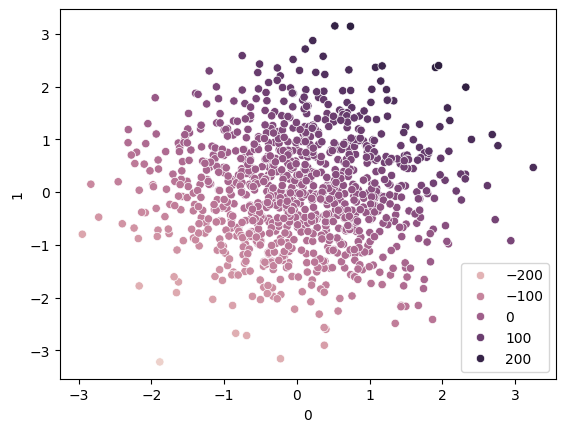

In [3]:
#visualizing the dataset we made
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue= y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [5]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [7]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [8]:
svr.fit(X_train,y_train) #fitting the model => training the model

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [9]:
svr.coef_

array([[41.43079444, 57.04191999]])

In [10]:
y_pred = svr.predict(X_test)
y_pred

array([  18.85168908, -112.91527573,   56.39431856,   -6.44107485,
        -10.60708981, -130.58997732, -125.87058305,   52.23210364,
       -164.29131102,   33.28051433,  -67.39457546,    3.14661092,
         31.63716743,   46.91950942,   41.42537605,   16.30871402,
        -24.19563321,  135.96833379,  -17.74345748,  -59.85398813,
        -15.31899151,    9.96400322,  -40.90471689,    1.53707396,
        -27.30503608,  -19.74228799,   73.16932997,   11.155592  ,
         29.40266042,  -47.38767874,  -29.27812445,  -80.61507937,
        -25.44694032,  -47.53209107,  -75.55474314,   -4.72589604,
        -22.10855956,   22.43200367,  -42.46535008,   37.41929719,
         31.61400593,   23.38407491,   78.65552962,   27.56366831,
         34.91561041,  -81.38002576,    1.43995405,  -17.45328654,
         -9.06883812,    1.39633894,  -90.9610684 ,  -11.98960564,
         85.37255954,   59.16956742,   34.56090127, -117.12326955,
         61.85616929,  -13.37222184,   10.97440625,   30.66462

In [11]:
#model evaluation
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9981025524631257

In [12]:
# hyperparameter tuning with SVR
from sklearn.model_selection import GridSearchCV

params= {'C':[1,2,3,10,50,120,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel' :['linear'],
        'epsilon':[0.01,0.1,0.2,0.3]}

In [13]:
grid = GridSearchCV(SVR(),param_grid = params, cv=5, verbose=3)
grid

,estimator,SVR()
,param_grid,"{'C': [1, 2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [14]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

,estimator,SVR()
,param_grid,"{'C': [1, 2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [15]:
grid.best_params_

{'C': 50, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [16]:
grid.best_score_

np.float64(0.998262279520285)

In [18]:
final_model = grid.best_estimator_
y_pred=final_model.predict(X_test)

In [20]:
r2_score(y_test,y_pred)

0.9981566278115876